#### Question:

Given the Sudoku image try to extract the numbers or highlight them using the appropriate image processing methods.

`Import the required libraries`

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import easyocr

`Function to display the images`

In [2]:
def display(img,name):
    plt.title(name)
    plt.imshow(img,cmap='gray') 
    plt.axis('off')

`Read the image`

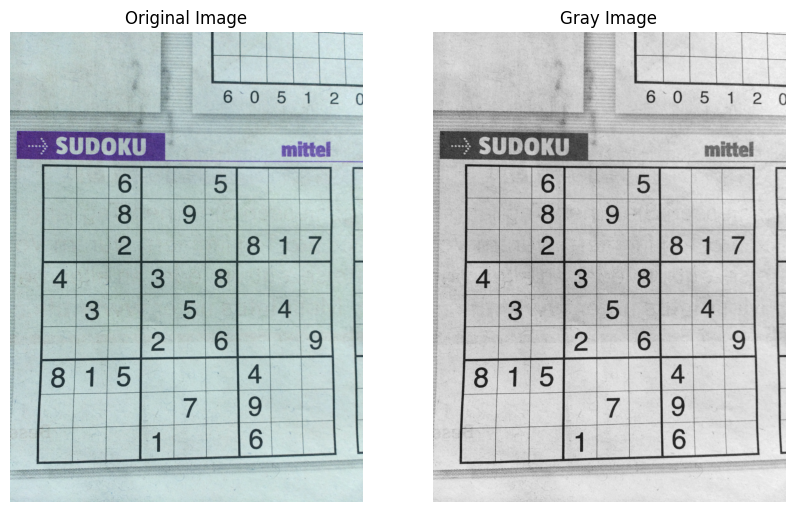

In [3]:
image = cv2.imread('image1004.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), display(image,'Original Image')
plt.subplot(1,2,2), display(gray,'Gray Image')
plt.show()

In [4]:
gray.shape

(1280, 960)

`Image Preprocessing`

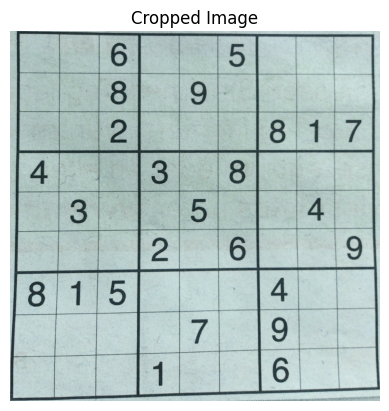

In [5]:
blur = cv2.GaussianBlur(gray, (5,5), 0) # Apply Gaussian blur
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2) # Apply adaptive threshold
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Find contours
contours = sorted(contours, key=cv2.contourArea, reverse=True) # Sort by area (keep only the largest one)
for cnt in contours:
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    if len(approx) == 4:
        # Crop and save the image
        x, y, w, h = cv2.boundingRect(cnt)
        cropped = image[y:y+h, x:x+w]
        display(cropped, 'Cropped Image')
        break

`Detecting the edges`

In [6]:
imagewrap_blur = cv2.GaussianBlur(cropped, (5, 5), 0)
edges = cv2.Canny(imagewrap_blur, 50, 100)

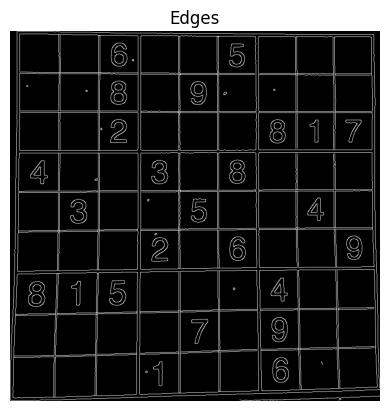

In [7]:
display(edges, 'Edges')

In [8]:
reader = easyocr.Reader(['en'])
result = reader.readtext(imagewrap_blur)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [10]:
for detection in result:
    box = detection[0]
    text = detection[1]
    x1, y1 = box[0][0], box[0][1]
    x2, y2 = box[2][0], box[2][1]
    cv2.rectangle(imagewrap_blur, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(imagewrap_blur, text, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

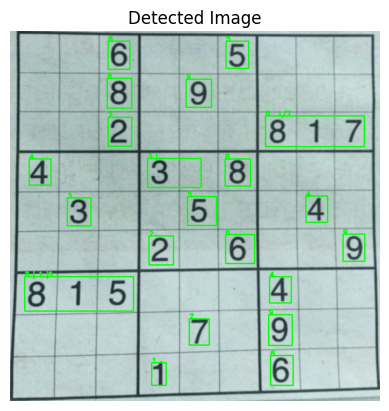

In [11]:
display(imagewrap_blur, 'Detected Image')